In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
motor_data = pd.read_csv('./unitree/data/go1.csv', index_col=0)
tor_ff = pd.read_csv('./unitree/data/forward.csv')

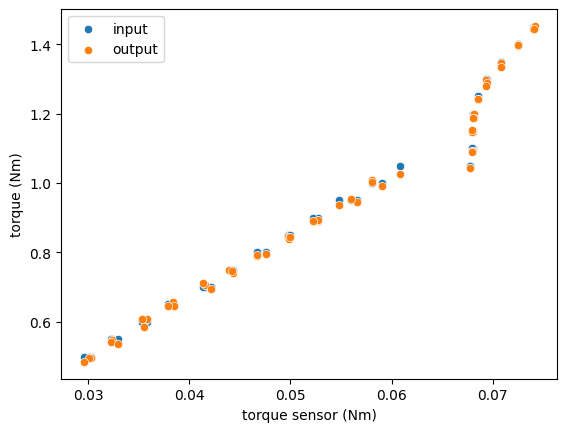

In [40]:
motor_data['torque_sensor'] = motor_data['voltage'].apply(lambda x: x  / 0.4509 * 22.6)
sns.scatterplot(data=motor_data, x='torque_sensor', y='input_torque')
sns.scatterplot(data=motor_data, x='torque_sensor', y='output_torque')
plt.ylabel('torque (Nm)')
plt.xlabel('torque sensor (Nm)')
plt.legend(['input', 'output'])
plt.show()

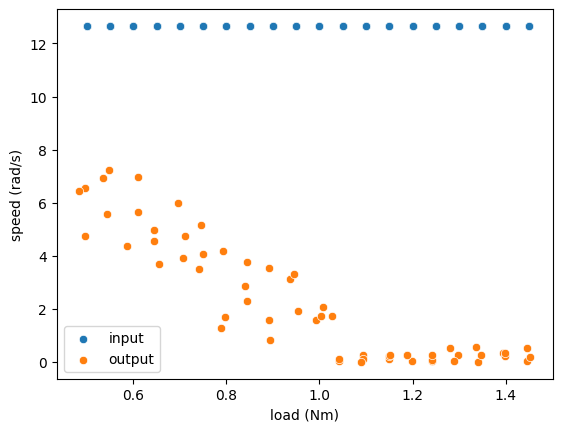

In [26]:
motor_data['output_speed'] = abs(motor_data['output_speed'])
sns.scatterplot(data=motor_data, x="input_torque", y='input_speed')
sns.scatterplot(data=motor_data, x="output_torque", y='output_speed')
plt.legend(labels=['input', 'output'])
plt.ylabel('speed (rad/s)')
plt.xlabel('load (Nm)')
plt.show()

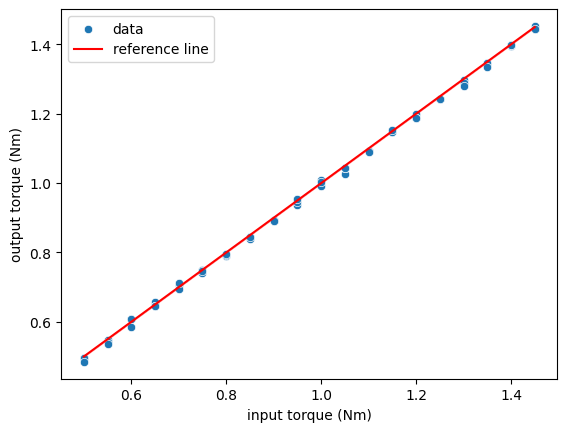

In [113]:
sns.scatterplot(data=motor_data, x="input_torque", y='output_torque')
sns.lineplot(data=motor_data, x='input_torque', y='input_torque', color='red')
plt.legend(['data', 'reference line'])
plt.ylabel('output torque (Nm)')
plt.xlabel('input torque (Nm)')
plt.show()

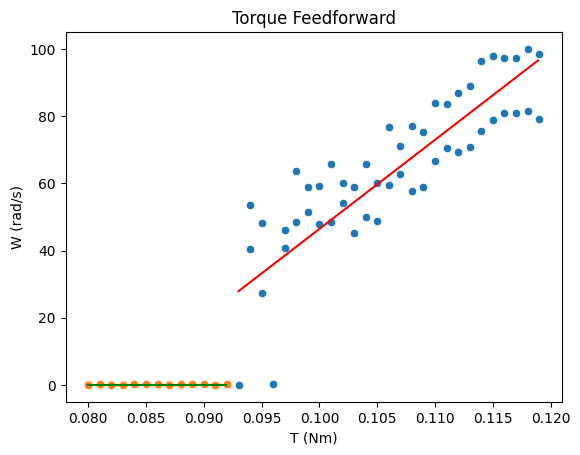

In [14]:
Threshold = 0.092

under_fit = tor_ff[tor_ff['T'] > Threshold]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(under_fit['T'].values.reshape(-1, 1), under_fit['W'].values.reshape(-1, 1))
x = np.arange(under_fit['T'].min(), under_fit['T'].max(), 0.0001)
static_x = np.arange(tor_ff['T'].min(), Threshold, 0.0001)
# Get the coefficients of the fitted line
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Generate the fitted line
fitting_line = slope * x + intercept
sns.lineplot(x=x, y=fitting_line.reshape(-1), color='red')
sns.lineplot(x=static_x, y=0, color='green')
sns.scatterplot(data=under_fit, x="T", y="W")
sns.scatterplot(data=tor_ff[tor_ff['T'] <= Threshold], x="T", y="W")
plt.title('Torque Feedforward')
plt.ylabel('W (rad/s)')
plt.xlabel('T (Nm)')
plt.show()

In [5]:
x

NameError: name 'x' is not defined